In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# ***Load dataset and perform basic exploratory data analysis***

In [2]:
# load dataset
if os.path.exists('../data/BMW sales data.csv'):
    df = pd.read_csv('../data/BMW sales data.csv')
else:
    raise FileNotFoundError('File not found! Please check file path and try again!')


In [3]:
display(df.head())

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
display(df.tail())

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [5]:
# overview of the dataset
df.shape # shape of dataset

(50000, 11)

In [6]:
df.info() # returns non-null counts and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
# a short descriptive summary of the dataset
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Model,50000,11,7 Series,4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2017.02,4.32,2010.0,2013.0,2017.0,2021.0,2024.0
Region,50000,6,Asia,8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,50000,6,Red,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,50000,4,Hybrid,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,50000,2,Manual,25154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size_L,50000.0,NaN,NaN,NaN,3.25,1.01,1.5,2.4,3.2,4.1,5.0
Mileage_KM,50000.0,NaN,NaN,NaN,100307.2,57941.51,3.0,50178.0,100388.5,150630.25,199996.0
Price_USD,50000.0,NaN,NaN,NaN,75034.6,25998.25,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,NaN,NaN,NaN,5067.51,2856.77,100.0,2588.0,5087.0,7537.25,9999.0


# ***Comprehensive exploratory data analysis***

In [8]:
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'missing values' : missing_values,
    'missing percentage' : missing_pct.round()
})
print(missing_data[missing_data['missing values'] > 0])

Empty DataFrame
Columns: [missing values, missing percentage]
Index: []


`No missing data`

In [9]:
df[df.duplicated()] 

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification


`No duplicated data`

In [10]:
df.columns.tolist() # names of the features in the dataset

['Model',
 'Year',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Engine_Size_L',
 'Mileage_KM',
 'Price_USD',
 'Sales_Volume',
 'Sales_Classification']

In [11]:
# basic numeric features analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('='*50)
print('BASIC NUMERIC COLUMNS ANALYSIS')
print('='*50,'\n')
print(numeric_cols,'\n')
for i,col in enumerate(numeric_cols,1):
    print(f'{i}. {col:<13} : Min_value : {df[col].min():<12} Max_value : {df[col].max()}')

BASIC NUMERIC COLUMNS ANALYSIS

['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume'] 

1. Year          : Min_value : 2010         Max_value : 2024
2. Engine_Size_L : Min_value : 1.5          Max_value : 5.0
3. Mileage_KM    : Min_value : 3            Max_value : 199996
4. Price_USD     : Min_value : 30000        Max_value : 119998
5. Sales_Volume  : Min_value : 100          Max_value : 9999


In [12]:
# basic categorical feature analysis
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('='*50)
print('BASIC CATEGORICAL COLUMNS ANALYSIS')
print('='*50,'\n')
for i,col in enumerate(categorical_cols,1):
    print(f'{i}. {col:<20} : Unique features : {df[col].unique()}')

BASIC CATEGORICAL COLUMNS ANALYSIS

1. Model                : Unique features : ['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']
2. Region               : Unique features : ['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
3. Color                : Unique features : ['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']
4. Fuel_Type            : Unique features : ['Petrol' 'Hybrid' 'Diesel' 'Electric']
5. Transmission         : Unique features : ['Manual' 'Automatic']
6. Sales_Classification : Unique features : ['High' 'Low']


In [13]:
# outlier detection using IQR
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1 # interquartile range

    lower_bound = q1 - 1.5 * IQR 
    upper_bound = q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

for i,col in enumerate(numeric_cols,1):
    outliers, lower_bound, upper_bound = outlier_detection(df,col)
    print(f'{i}. {col:<13} : {len(outliers)} outliers   (Range: {lower_bound:.2f} - {upper_bound:.2f} )')

1. Year          : 0 outliers   (Range: 2001.00 - 2033.00 )
2. Engine_Size_L : 0 outliers   (Range: -0.15 - 6.65 )
3. Mileage_KM    : 0 outliers   (Range: -100500.38 - 301308.62 )
4. Price_USD     : 0 outliers   (Range: -15355.50 - 165418.50 )
5. Sales_Volume  : 0 outliers   (Range: -4835.88 - 14961.12 )


In [14]:
# data distribution analysis 
from scipy.stats import normaltest
for i,col in enumerate(numeric_cols,1):
    stat, p_value = normaltest(df[col])
    is_normal = 'Normal' if p_value > 0.05 else 'Not Normal'
    print(f'{i}. {col:<13} : P-value = {p_value} ({is_normal})')

1. Year          : P-value = 0.0 (Not Normal)
2. Engine_Size_L : P-value = 0.0 (Not Normal)
3. Mileage_KM    : P-value = 0.0 (Not Normal)
4. Price_USD     : P-value = 0.0 (Not Normal)
5. Sales_Volume  : P-value = 0.0 (Not Normal)


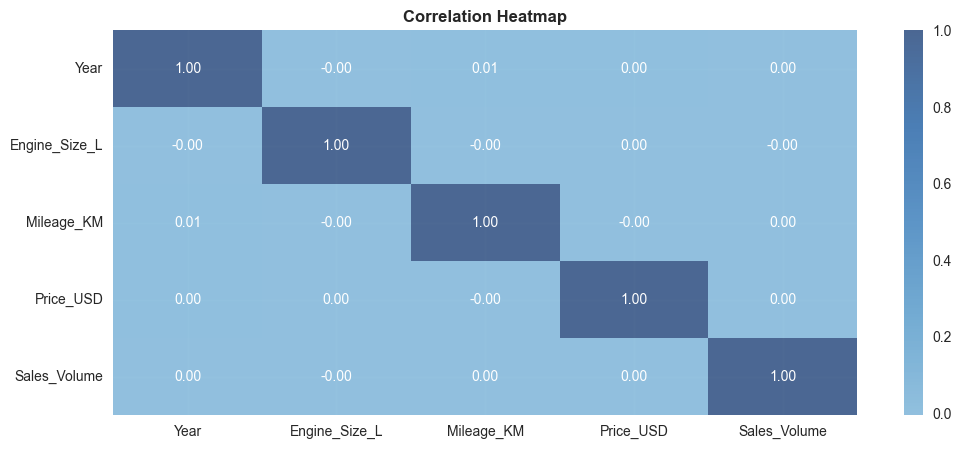

In [15]:
# correlation matrix
plt.figure(figsize=(12,5))
corr = df[numeric_cols].corr(method='spearman')
sns.heatmap(data=corr, annot= True, alpha= 0.7, center= 0, fmt= '.2f',cmap='Blues')
plt.title('Correlation Heatmap',fontsize= 12, fontweight = 'bold')
plt.grid(True, alpha = 0.3)
plt.show()

# ***INSIGHTS GENERATED FROM DATA***
* `File` : `BMW sales data.csv`
* `Shape` : `50,000 rows, 11 features`
* `Goal` : `Predict BMW car prices from sales data from the year 2010 t0 2024`

# *Feature Table*
|Feature       | Type        | Role          | Description   |
|---------------|-------------|---------------|---------------|
|`Year`       | int          | Feature  | Manufacturing year of the car |
|`Engine Size L` | float | Feature | Engine displacement (in litres) |
|`Mileage KM`  | int | Feature | Total distance driven by the car (in kilometres) |
|`Sales Volume` | int |Feature |Number of BMW units sold|
|`Model`  | object | Feature | Car Model (e.g. 5 Series, X5, M3) |
|`Region`     | object | Feature | Regions in which the car was sold (e.g. Asia, Africa, Middle East, Europe) |
|`Color` | object       | Feature  | Color of the car (e.g. red, blue, silver) |
|`Fuel Type` | object | Feature | Fuel type the car uses (e.g. Electric, hybrid, diesel) |
|`Transmission`  | object | Feature  | Whether the car is automatic or manual |
|`Sales Classification`   |object | Feature | Whether the sale is considered a high or low sale |
|`Price (USD)`  | object | `Target`  | Sale Price of the BMW car |

# ***Advanced Visualizations***

***`Univariate Analysis`***

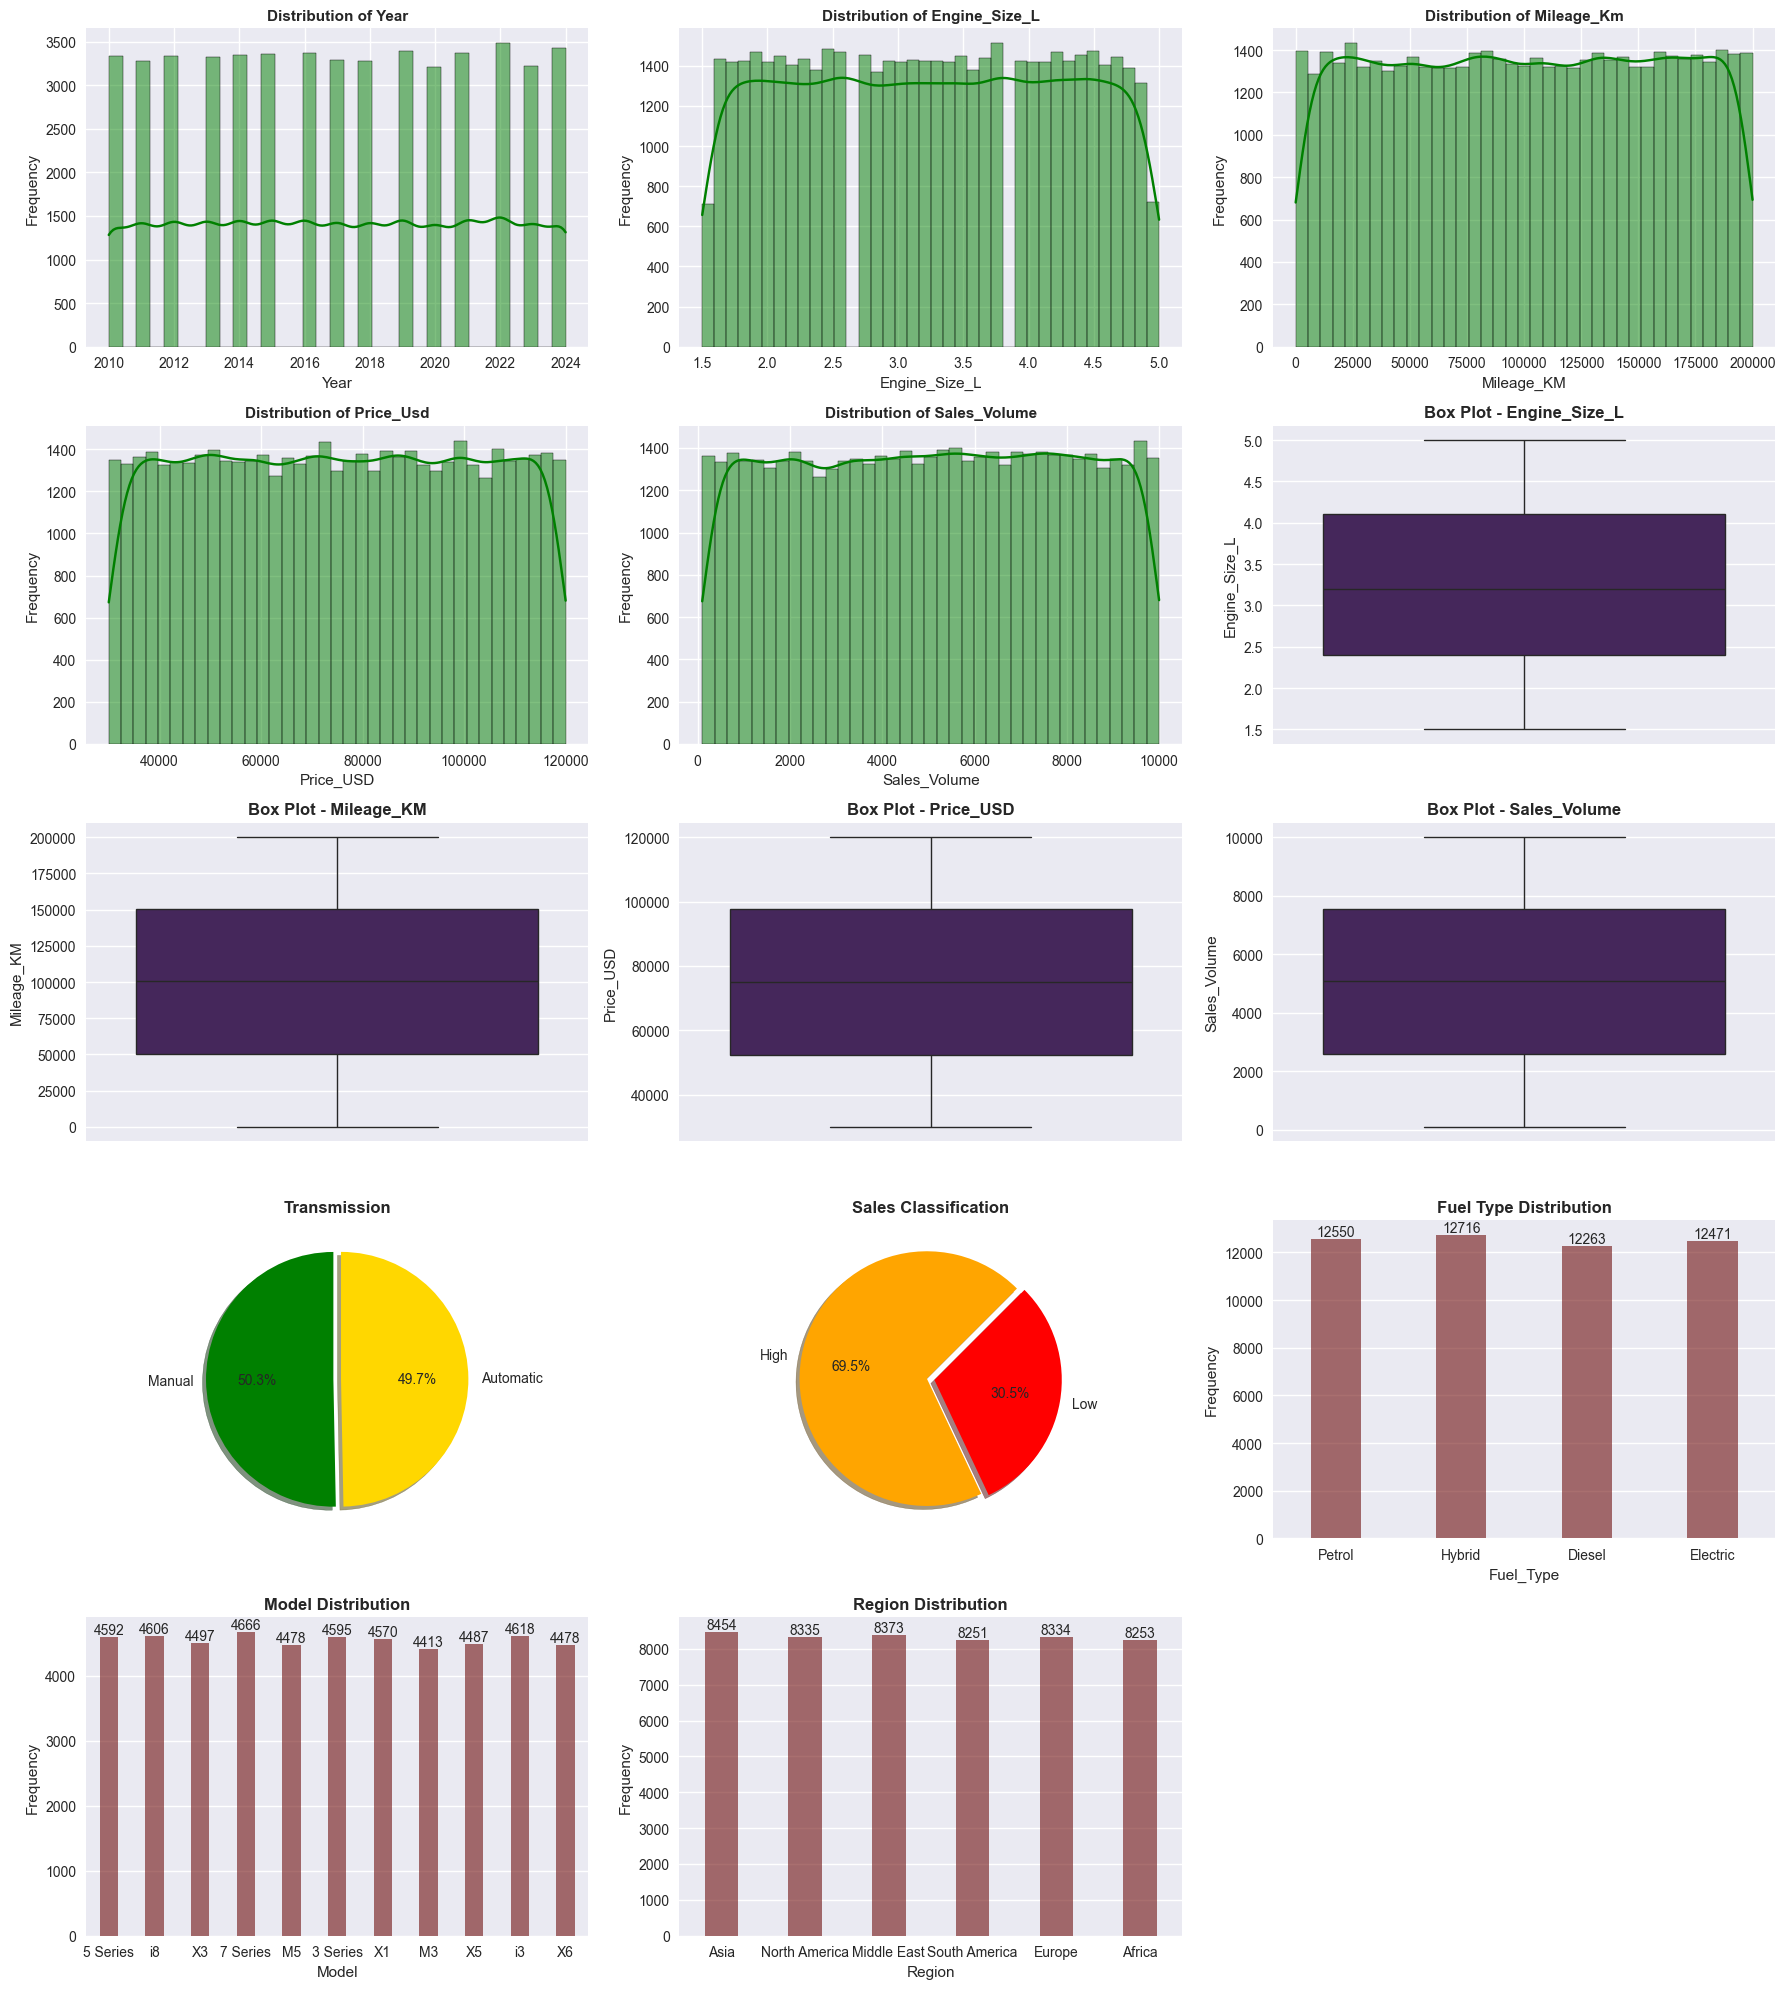

In [17]:
plt.figure(figsize=(18,20))

# Distribution Plots
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, color= 'green')
    plt.title(f'Distribution of {col.title()}', fontsize = 11, fontweight = 'bold')
    plt.ylabel('Frequency')

# boxplots for outlier detection
for i,col in enumerate(numeric_cols[1:]):
    plt.subplot(5, 3, 6+i)
    sns.boxplot(data=df, y= col, color= 'indigo', saturation=0.4)
    plt.title(f'Box Plot - {col}', fontsize = 12, fontweight = 'bold')

plt.subplot(5, 3 ,10)
plt.pie(data=df,x=df['Transmission'].value_counts(), labels=df['Transmission'].unique(),
        colors=['green','gold'],explode=[0.03,0.03],shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Transmission',fontsize=12, fontweight='bold')

plt.subplot(5, 3 ,11)
plt.pie(data=df,x=df['Sales_Classification'].value_counts(), labels=df['Sales_Classification'].unique(),
        colors=['orange','red'],explode=[0.03,0.03],shadow=True, autopct='%1.1f%%',startangle=45)
plt.title('Sales Classification',fontsize=12, fontweight='bold')
plt.grid(True, alpha= 0.3)

plt.subplot(5, 3, 12)
ax = sns.countplot(data=df, x= df['Fuel_Type'],color='maroon', alpha=0.6,width=0.5,gap=0.2)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')
plt.title('Fuel Type Distribution',fontsize= 12, fontweight= 'bold')
plt.ylabel('Frequency')

plt.subplot(5, 3, 13)
ax = sns.countplot(data=df, x= df['Model'],color='maroon', alpha=0.6,width=0.5,gap=0.2)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')
plt.title('Model Distribution',fontsize= 12, fontweight= 'bold')
plt.ylabel('Frequency')

plt.subplot(5, 3, 14)
ax = sns.countplot(data=df, x= df['Region'],color='maroon', alpha=0.6,width=0.5,gap=0.2)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')
plt.title('Region Distribution',fontsize= 12, fontweight= 'bold')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

***`Bivariate Analysis`***

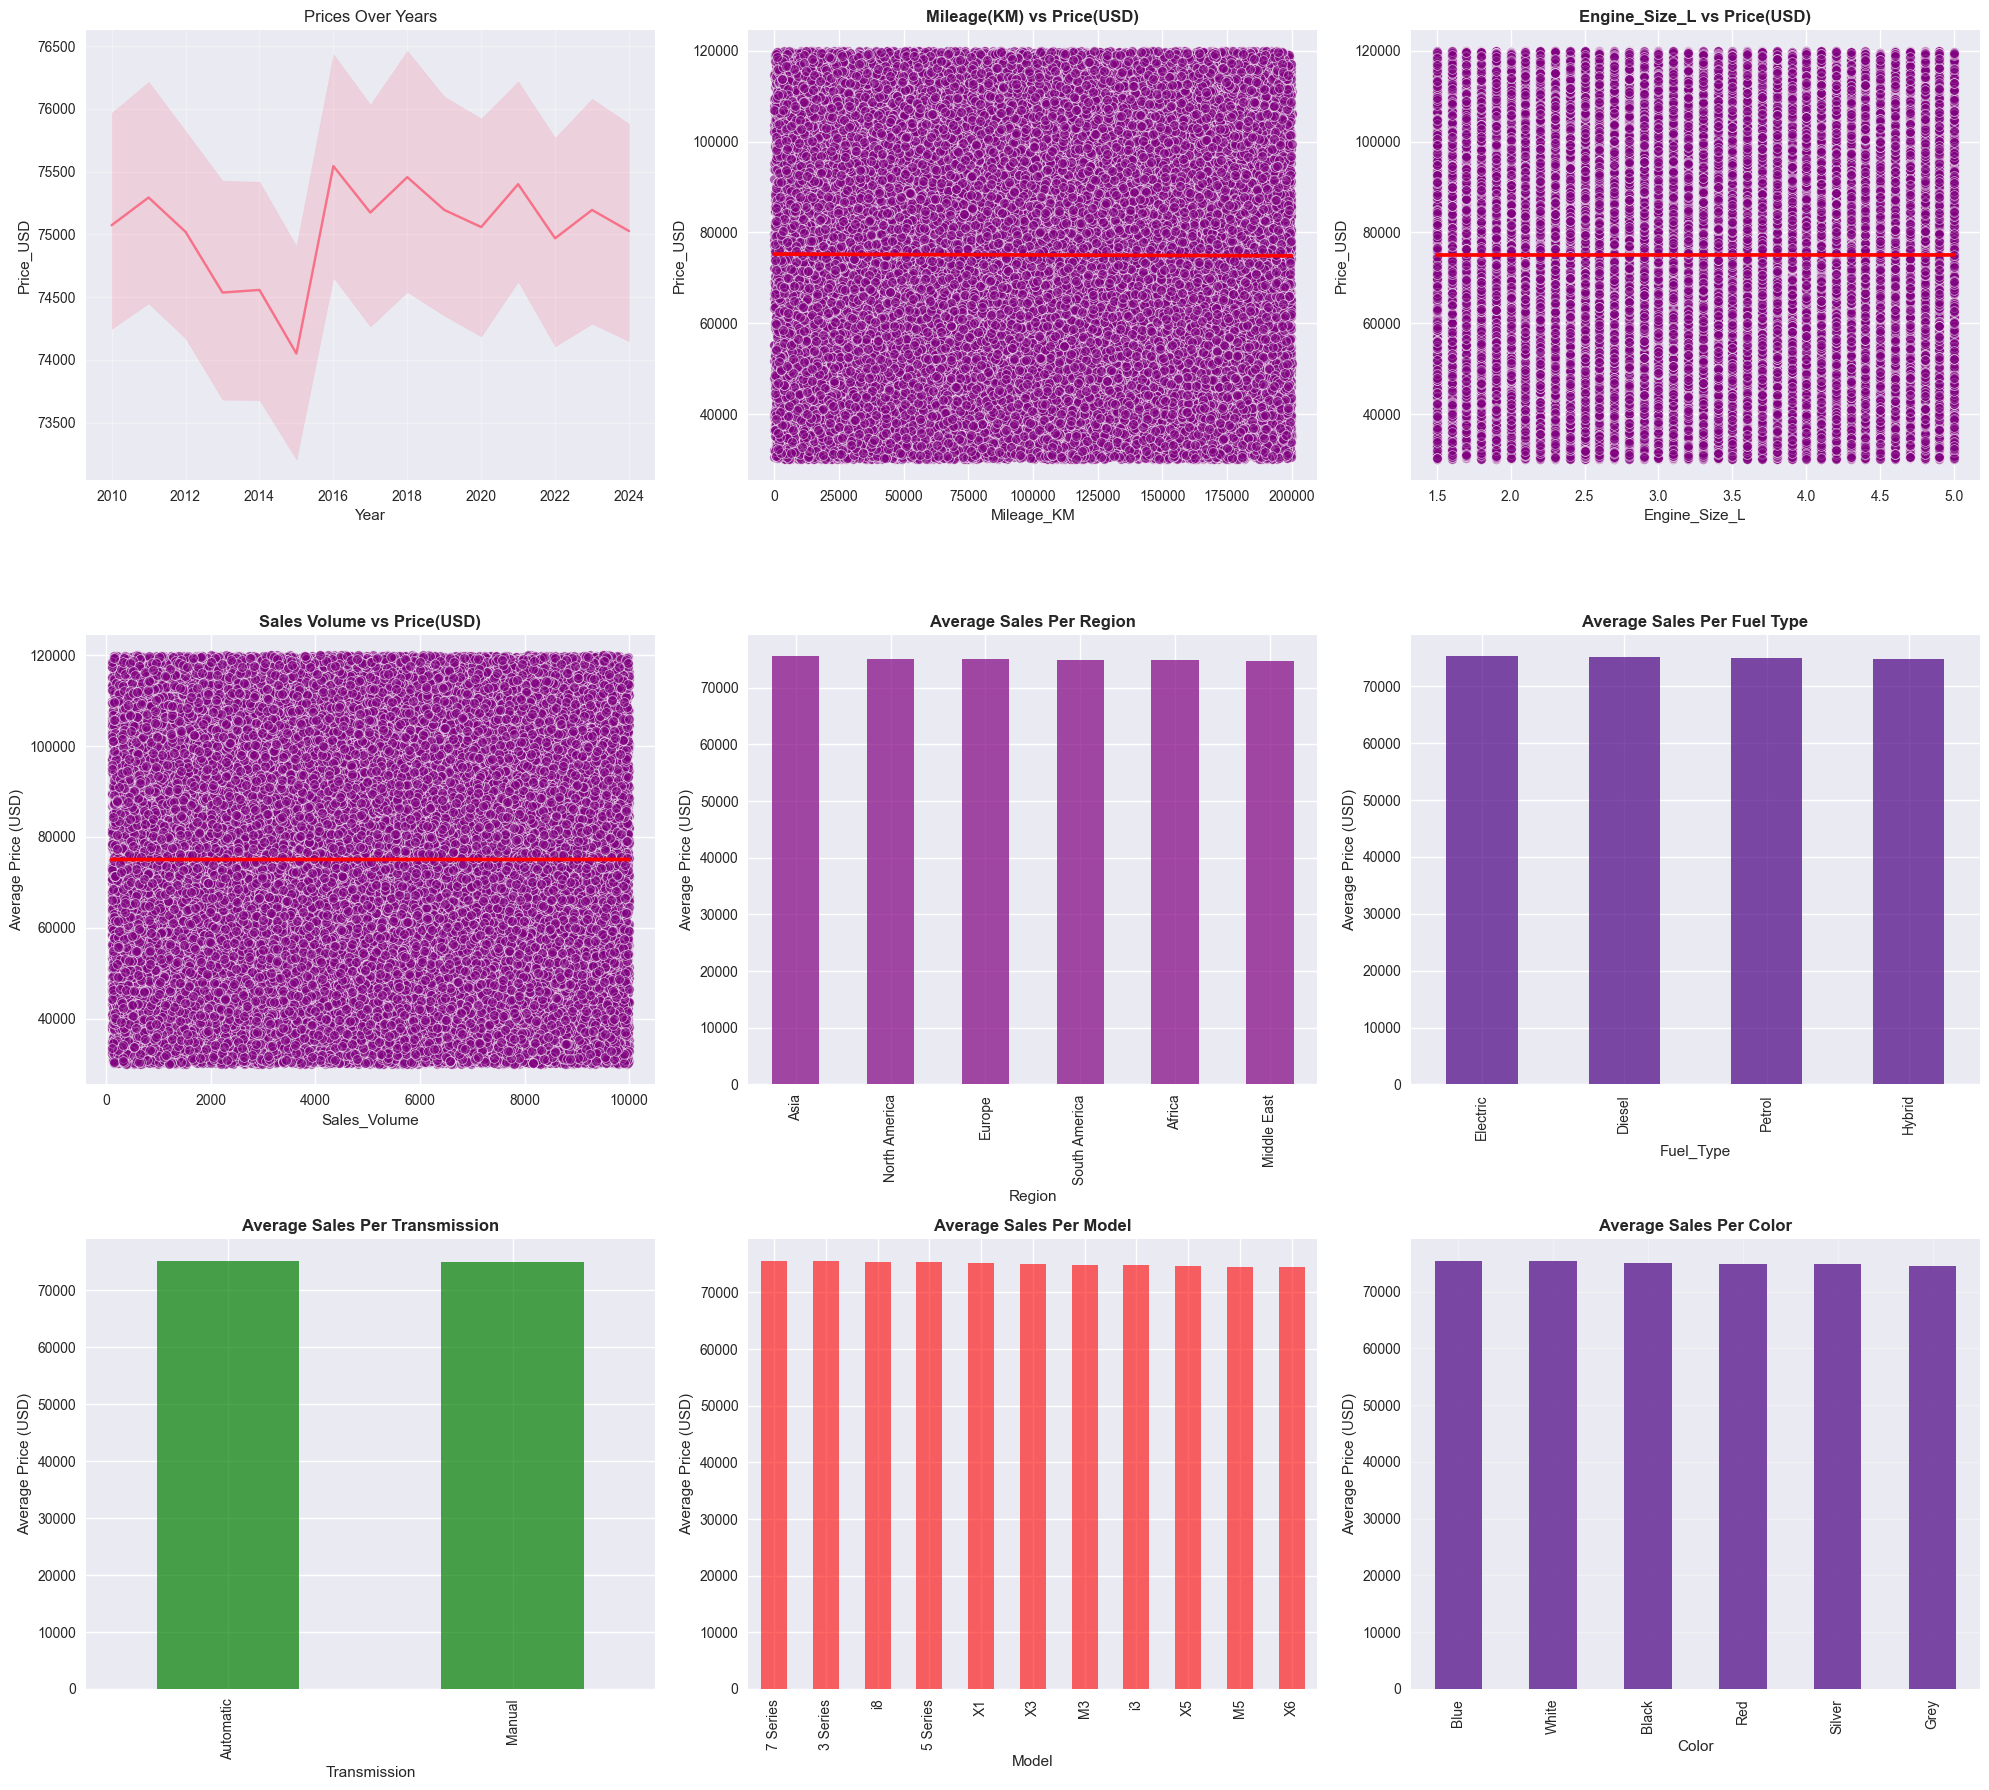

In [21]:
plt.figure(figsize=(20,18))

# relationship with years and sales over time
plt.subplot(3, 3, 1)
sns.lineplot(data=df, x= 'Year', y= 'Price_USD',markers= 'x')
plt.title('Prices Over Years')
plt.grid(True,alpha=0.3)

# scatter plots with regression lines
plt.subplot(3, 3, 2)
sns.scatterplot(data=df,x='Mileage_KM',y='Price_USD',alpha=0.6,color='purple',markers='x')
sns.regplot(data=df,x='Mileage_KM',y='Price_USD',scatter=False,color='red')
plt.title('Mileage(KM) vs Price(USD)',fontsize=12, fontweight= 'bold')

plt.subplot(3, 3, 3)
sns.scatterplot(data=df,x='Engine_Size_L',y='Price_USD',alpha=0.6,color='purple',markers='x')
sns.regplot(data=df,x='Engine_Size_L',y='Price_USD',scatter=False,color='red')
plt.title('Engine_Size_L vs Price(USD)',fontsize=12, fontweight= 'bold')

plt.subplot(3, 3, 4)
sns.scatterplot(data=df,x='Sales_Volume',y='Price_USD',alpha=0.6,color='purple',markers='x')
sns.regplot(data=df,x='Sales_Volume',y='Price_USD',scatter=False,color='red')
plt.title('Sales Volume vs Price(USD)',fontsize=12, fontweight= 'bold')
plt.ylabel('Average Price (USD)')

# sales per region
plt.subplot(3, 3, 5)
df.groupby('Region')['Price_USD'].mean().sort_values(ascending=False).plot.bar(
    color='purple', alpha= 0.7)
plt.title('Average Sales Per Region',fontsize=12, fontweight = 'bold')
plt.ylabel('Average Price (USD)')

# sales per fuel type
plt.subplot(3, 3, 6)
df.groupby('Fuel_Type')['Price_USD'].mean().sort_values(ascending=False).plot.bar(
    color='indigo', alpha=0.7
)
plt.title('Average Sales Per Fuel Type',fontsize=12, fontweight = 'bold')
plt.ylabel('Average Price (USD)')

# sales per transmission
plt.subplot(3, 3, 7)
df.groupby('Transmission')['Price_USD'].mean().sort_values(ascending=False).plot.bar(
    color='green', alpha=0.7)
plt.title('Average Sales Per Transmission',fontsize=12, fontweight = 'bold')
plt.ylabel('Average Price (USD)')

# sales per model
plt.subplot(3, 3, 8)
df.groupby('Model')['Price_USD'].mean().sort_values(ascending=False).plot.bar(
    color='red', alpha=0.6)
plt.title('Average Sales Per Model',fontsize=12, fontweight = 'bold')
plt.ylabel('Average Price (USD)')

# sales per color
plt.subplot(3, 3, 9)
df.groupby('Color')['Price_USD'].mean().sort_values(ascending=False).plot.bar(
    color='indigo', alpha=0.7)
plt.title('Average Sales Per Color',fontsize=12, fontweight = 'bold')
plt.ylabel('Average Price (USD)')

plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()